In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Data Acquisition

In [2]:
df = pd.read_csv('data.csv')
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Exploratory Data Analysis

In [3]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [4]:
# make the indexes of the column names uniform
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns


Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [5]:
# make the string values of rows uniform
strings = list(df.select_dtypes('object'))
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [6]:
for col in strings:
    df[strings].apply(lambda x : x.str.lower().str.replace(' ','_'))

In [7]:
df.head(5)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [8]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [9]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler']
48

model
['1 Series M' '1 Series' '100' '124 Spider' '190-Class']
915

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium unleaded (required)' 'regular unleaded'
 'premium unleaded (recommended)' 'flex-fuel (unleaded/E85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['MANUAL' 'AUTOMATIC' 'AUTOMATED_MANUAL' 'DIRECT_DRIVE' 'UNKNOWN']
5

driven_wheels
['rear wheel drive' 'front wheel drive' 'all wheel drive'
 'four wheel drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['Factory Tuner,Luxury,High-Performance' 'Luxury,Performance'
 'Luxury,High-Performance' 'Luxury' 'Performance']
71

vehicle_size
['Compact' 'Midsize' 'Large']
3

vehicle_style
['Coupe' 'Convertible' 'Sedan' 'Wagon' '4dr Hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

<Axes: xlabel='msrp', ylabel='Count'>

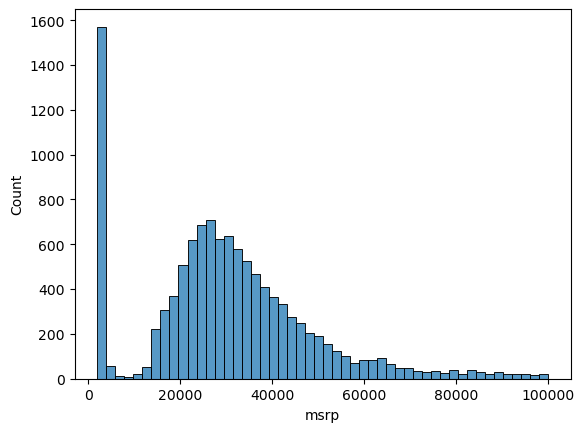

In [10]:
#visualize the MRSP price
sns.histplot(df.msrp[df['msrp'] < 100000] , bins = 50)

In [10]:
#From the graph we can see it is a tail end graph
# Apply Logarithmic function to avoid confusing the ML model(remove the tail-end of graph)
log_price = np.log1p(df['msrp'])
log_price

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

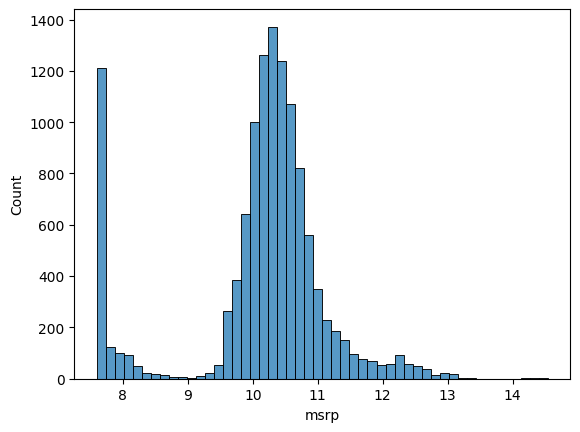

In [11]:
sns.histplot(log_price, bins= 50)

In [ ]:
#Now the graph resembels a bell curve

#### Check & clean missing values

In [12]:
df.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### Setting Up Validation Framework 
###### Train -- Validation -- Test
###### 60% of data for Train 
###### 20% of data for Validation
###### 20% of data for Testing

In [16]:
# size of data
size = len(df)
size

11914

In [20]:
#calculate how much is needed for validation,testing and training
val_size = int(size * 0.2)
test_size = int(size * 0.2)

#since the above values are rounded, we subtract the sum of the val_size and test_size from size of dataset
train_size = size - (val_size + test_size)

val_size , test_size , train_size
#size,val_size + test_size + train_size

(2382, 2382, 7150)

In [25]:
#define validation, test and train datasets
# the dataset has to be shuffled inorder to distribute all features uniformly 
train_df = df.iloc[train_size :]
val_df = df.iloc[train_size: train_size + val_size]
test_df = df.iloc[train_size + val_size: ]

In [27]:
#shuffle the size of the dataset
idx  = np.arange(size)
np.random.shuffle(idx)
idx

array([1009, 3173, 3072, ..., 1065, 8369, 6271])

In [28]:
# the test, train and validation datasets will be declared through the shuffled dataset
train_df = df.iloc[idx[train_size :]]
val_df = df.iloc[idx[train_size: train_size + val_size]]
test_df = df.iloc[idx[train_size + val_size: ]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
1868,Volkswagen,Beetle Convertible,2016,regular unleaded,170.0,4.0,AUTOMATIC,front wheel drive,2.0,NaN,Compact,Convertible,34,25,873,25995
11730,Cadillac,XLR-V,2009,premium unleaded (required),443.0,8.0,AUTOMATIC,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Convertible,23,14,1624,104215
4677,Ford,Fiesta,2016,regular unleaded,120.0,4.0,MANUAL,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,35,27,5657,16110
6411,Subaru,Legacy,2017,regular unleaded,175.0,4.0,AUTOMATIC,all wheel drive,4.0,NaN,Midsize,Sedan,34,25,640,21995
9162,Dodge,Shadow,1993,regular unleaded,100.0,4.0,MANUAL,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,29,22,1851,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9431,Rolls-Royce,Silver Seraph,2001,premium unleaded (required),322.0,12.0,AUTOMATIC,rear wheel drive,4.0,"Exotic,Luxury",Large,Sedan,15,11,86,219900
11563,Volvo,XC60,2015,regular unleaded,302.0,4.0,AUTOMATIC,front wheel drive,4.0,"Crossover,Luxury,Performance",Midsize,4dr SUV,30,22,870,45550
1065,Audi,A4,2015,premium unleaded (required),220.0,4.0,AUTOMATIC,all wheel drive,4.0,Luxury,Midsize,Sedan,31,22,3105,39700
8369,Aston Martin,Rapide,2010,premium unleaded (required),470.0,12.0,AUTOMATIC,rear wheel drive,4.0,"Exotic,High-Performance",Large,Sedan,19,13,259,197850
